<h1 style="direction: rtl; text-align: center;"><span style="color: #339966;">&nbsp;توقع أمراض القلب باستخدام تقنيات تنقيب البيانات و "تعلم الآلة "</span></h1>
<h3 id="heart-disease-prediction-using-data-mining" style="direction: rtl; text-align: center;"><span style="color: #339966;">&nbsp;heart disease prediction using data mining and ML</span></h3>
<p style="direction: rtl;">&nbsp;</p>
<p style="direction: rtl;">&nbsp;</p>
<h3 style="direction: rtl;"><span style="color: #008080;">معلومات وصفية عن مصدر البيانات الذي سنستخدمه في المشروع :</span></h3>
<p>&nbsp;</p>
<h3 style="direction: rtl;"><span style="color: #ff9900;">Framingham Heart study dataset</span></h3>
<p style="direction: ltr; text-align: left;"><span style="color: #0000ff;">includes several demographic risk factors:</span></p>
<p style="direction: ltr; text-align: left;">- sex: male or female;</p>
<p style="direction: ltr; text-align: left;">-age: age of the patient;</p>
<p style="direction: ltr; text-align: left;">- education: levels coded 1 for some high school, 2 for a high school diploma or GED, 3 for some college or vocational school, and 4 for a college degree.</p>
<p style="direction: ltr; text-align: left;">&nbsp;</p>
<p style="direction: ltr; text-align: left;"><span style="color: #0000ff;">The data set also includes behavioral risk factors associated with smoking :</span></p>
<p style="direction: ltr; text-align: left;">- currentSmoker: whether or not the patient is a current smoker</p>
<p style="direction: ltr; text-align: left;">- cigsPerDay: the number of cigarettes that the person smoked on average in one day.</p>
<p style="direction: ltr; text-align: left;">&nbsp;</p>
<p style="direction: ltr; text-align: left;"><span style="color: #0000ff;">Medical history risk factors:</span></p>
<p style="direction: ltr; text-align: left;">- BPMeds: whether or not the patient was on blood pressure medication .</p>
<p style="direction: ltr; text-align: left;">- prevalentStroke: whether or not the patient had previously had a stroke .</p>
<p style="direction: ltr; text-align: left;">- prevalentHyp: whether or not the patient was hypertensive.</p>
<p style="direction: ltr; text-align: left;">- diabetes: whether or not the patient had diabetes</p>
<p style="direction: ltr; text-align: left;"><span style="color: #3366ff;">Risk factors from the first physical examination of the patient.</span></p>
<p style="direction: rtl; text-align: left;">- totChol: total cholesterol level .</p>
<p style="direction: rtl; text-align: left;">- sysBP: systolic blood pressure.</p>
<p style="direction: rtl; text-align: left;">- diaBP: diastolic blood.</p>
<p style="direction: rtl; text-align: left;">- pressure BMI: Body Mass Index .</p>
<p style="direction: rtl; text-align: left;">- heartRate: heart rate.</p>
<p style="direction: rtl; text-align: left;">- glucose: glucose level .</p>
<p style="direction: rtl; text-align: left;">- TenYearCHD: 10 year risk of coronary heart disease CHD .</p>

<h3 style="direction: rtl; text-align: right;"><span style="color: #008080;">معلومات عن بيئة العمل الخاصة بالمشروع :&nbsp;</span></h3>
<p style="direction: rtl; text-align: right;">تم استخدام :&nbsp;</p>
<p style="direction: rtl; text-align: right;"><strong>- توزيعة أناكوندا Anaconda الاصدار 5.0.1.</strong></p>
<p style="direction: rtl; text-align: right;"><strong>- لغة البرمجة بايثون الاصدار الثالث (3.6).</strong></p>
<p style="direction: rtl; text-align: right;"><strong>- بيئة عمل Jupyter Notebook الاصدار الخامس .</strong></p>
<p style="direction: rtl; text-align: right;"><span style="background-color: #ccffcc;">* توزيعة أناكوندا تضم كلاً من مترجم بايثون وبيئة Jupyter بالاضافة الى المكتبات التي تم استعمالها بالمشروع ، مما يعني أن تثبيت أناكوندا كافي ،&nbsp;</span></p>
<p style="direction: rtl; text-align: right;"><a href="https://www.anaconda.com/download/" target="_blank" rel="noopener">رابط التحميل</a></p>
<p style="direction: rtl; text-align: right;"><br /><br /></p>

<h2 style="direction: rtl; text-align: right;"><span style="color: #008080;">اعداد المكتبات اللازمة للمشروع :&nbsp;</span></h2>

In [289]:
import warnings
warnings.filterwarnings('ignore')

%config IPCompleter.greedy=True

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree    
import sklearn.ensemble as ske

    
import seaborn as sns
sns.set(color_codes=True)

<h1 style="direction: rtl;"><span style="color: #008080;">التحليل الإستكشافي للبيانات </span></h1>
<h2 style="direction:rtl;text-align: right;"><span style="color: #333399;">التعرف على البيانات</span></h2>
<p style="text-align: right;">نص عادي</p>




<p style="text-align: right;">.heart_data.csv :قراءة البيانات الموجودة بالداتاسيت</p>




In [290]:
DataSet = pd.read_csv('heart_data.csv')

<p style="text-align: right;"><strong><span style="color: #333399;">: عينة من البيانات التي سنتعامل معها</span></strong></p>

In [291]:
DataSet.sample(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1530,0,48,1.0,0,0.0,0.0,0,0,0,205.0,112.0,71.0,17.11,73.0,75.0,0
1603,0,61,1.0,1,10.0,0.0,0,0,0,200.0,187.0,95.5,21.57,58.0,64.0,0
967,0,61,1.0,0,0.0,0.0,0,0,0,210.0,122.0,81.0,22.48,68.0,97.0,0


<p style="text-align: right;"><strong><span style="color: #333399;">: عدد البيانات في كل عمود</span></strong></p>

In [292]:
DataSet.count()

male               4240
age                4240
education          4135
currentSmoker      4240
cigsPerDay         4211
BPMeds             4187
prevalentStroke    4240
prevalentHyp       4240
diabetes           4240
totChol            4190
sysBP              4240
diaBP              4240
BMI                4221
heartRate          4239
glucose            3852
TenYearCHD         4240
dtype: int64

<p style="text-align: right;"><strong><span style="color: #333399;">: البيانات بالتفصيل</span></strong></p>


<p style="direction: rtl; text-align: right;">std : &nbsp;الانحراف المعياري (بالإنجليزية:&nbsp;<em>Standard</em>&nbsp;deviation)</p>
<p style="direction: rtl; text-align: right;">mean :&nbsp;<em>المتوسط الحسابي</em>، أو&nbsp;<em>الوسط الحسابي</em>، وأحياناً المعدّل (بالإنجليزية: arithmetic&nbsp;<em>mean</em>)&nbsp;&nbsp;</p>
<p style="direction: rtl; text-align: right;">count : عدد العناصر .</p>

In [293]:
DataSet.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<h4 style="direction: rtl;"><span style="color: #0000ff;">عدد قيم الـtarget وهو العمود الأخير باِطار البيانات TenYearCHD:</span></h4>
<p style="direction: rtl;">0 يشير الى الأشخاص الذين لم يصيبوا بمرض القلب التاجي في العشر سنوات الأخيرة .</p></br>
<p style="direction: rtl;">1 يشير الى الأشخاص الذين اُصيبوا بمرض القلب التاجي في العشر سنوات الأخيرة .</p>



In [294]:
DataSet.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

<h2 style="direction:rtl;text-align: right;"><span style="color: #333399;">ترتيب البيانات واستعراضها</span></h2>


<p style="direction: rtl; text-align: right;">ازالة جميع البيانات التي توجد بها معلومات ناقصة</p>


In [295]:
DataSet = DataSet.dropna()

<p style="direction: rtl; text-align: right;">الآن أصبح عدد القيم الموجودة بكل الأعمدة متساوي:</p>


In [296]:
DataSet.count()

male               3658
age                3658
education          3658
currentSmoker      3658
cigsPerDay         3658
BPMeds             3658
prevalentStroke    3658
prevalentHyp       3658
diabetes           3658
totChol            3658
sysBP              3658
diaBP              3658
BMI                3658
heartRate          3658
glucose            3658
TenYearCHD         3658
dtype: int64

<h4 style="direction: rtl; text-align: right;"><strong><span style="color: #339966;">دراسة الحالة الاجتماعية للعينات :</span></strong></h4>
<h4 style="direction: rtl; text-align: right;">أولاً بناء اطار بيانات (جدول) للمعلومات الاجتماعية:&nbsp;</h4>

In [297]:
social_data =DataSet.loc[:,:"cigsPerDay"]
social_data['age_bin'] = pd.cut(DataSet['age'], [30, 40, 50,60,70], labels=['30 - 40', '40 - 50', '50 - 60','60-70'])
cat_social_data = social_data.copy()
cat_social_data['male'] = social_data['male'].replace({0: 'Female', 1: 'Male'})
cat_social_data['education'] = social_data['education'].replace({1: 'high school', 2: 'high school diploma or GED',3: 'college or vocational school', 4: 'college degree.'})
cat_social_data['currentSmoker'] = social_data['currentSmoker'].replace({0: 'smocker', 1: 'not smocker'})
cat_social_data.rename(columns={'male': 'gender'}, inplace=True)


<h4 style="direction: rtl; text-align: right;">عينة:&nbsp;</h4>

In [298]:
cat_social_data.sample(5)

,gender,age,education,currentSmoker,cigsPerDay,age_bin
1853,Female,39,high school,smocker,0.0,30 - 40
1170,Male,67,high school,smocker,0.0,60-70
1661,Female,44,high school,not smocker,20.0,40 - 50
1718,Female,43,college or vocational school,not smocker,1.0,40 - 50
559,Female,37,college degree.,not smocker,20.0,30 - 40


<h2 id="تحليل-الإرتباط-بين-بيانات-العينات" style="direction: rtl; text-align: right;"><span style="color: #000080;">تحليل الإرتباط بين بيانات العينات</span></h2>
<p style="direction: rtl; text-align: right;">وتحليل الإرتباط يعني دراسة العلاقة بين متغيرين, والهدف الاساسي له هو تحديد مدى درجة العلاقة بين المتغيرات, من صفر (لا يوجد أرتباط no Correlation) إلى 1 وهو الإرتباط الكامل (Perfect Correlation ).</p>
<p style="direction: rtl; text-align: right;"><a href="https://ar.wikipedia.org/wiki/%D9%85%D8%B9%D8%A7%D9%85%D9%84_%D8%B3%D8%A8%D9%8A%D8%B1%D9%85%D8%A7%D9%86_%D9%84%D9%84%D8%A7%D8%B1%D8%AA%D8%A8%D8%A7%D8%B7" target="_blank" rel="noopener">المزيد من المعلومات&nbsp;</a></p>

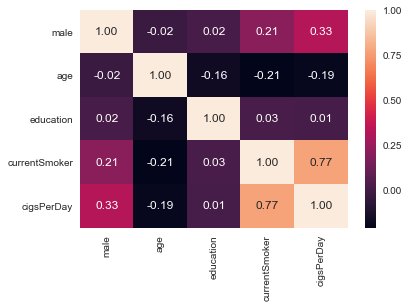

In [299]:
#sns.stripplot(data=social_data, y='age', x='education')
sns.heatmap(social_data.corr(), annot=True, fmt=".2f")

<h3 style="direction:rtl;text-align: right;"><span style="color: #333399;">توزيع المستوى الدراسي حسب العمر : </span></h3>

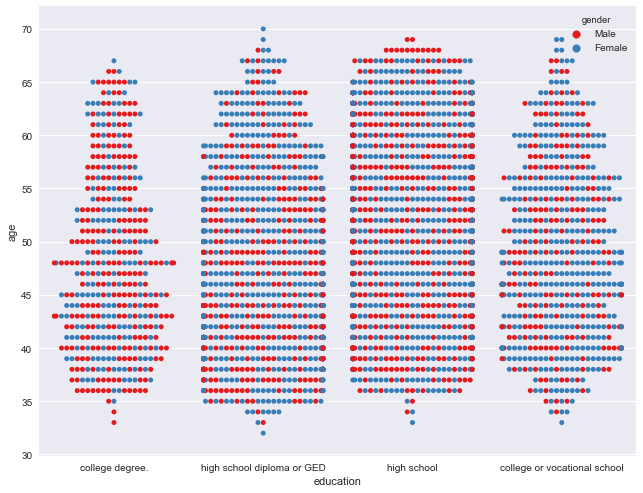

In [300]:
sns.set(rc={'figure.figsize':(10.7,8.27)})

#sns.set_style("whitegrid")
sns.set_palette("Set1")


sns.swarmplot(data=cat_social_data, y='age', x='education',hue=cat_social_data.gender)

<h3 style="direction:rtl;text-align: right;"><span style="color: #333399;">سلوكيات التدخين لدى الجنسين : </span></h3>

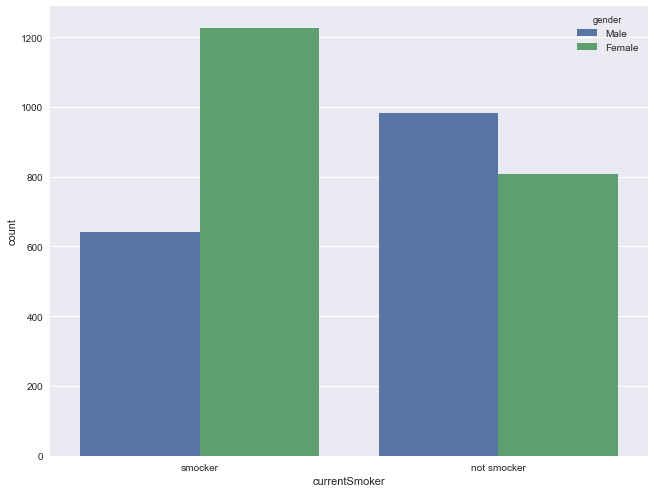

In [301]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.countplot( cat_social_data.currentSmoker,hue=cat_social_data.gender)

<h4 style="direction:rtl;text-align: right;"><span style="color: #333399;">عدد السجائر في اليوم حسب المستويات العمرية : </span></h4>

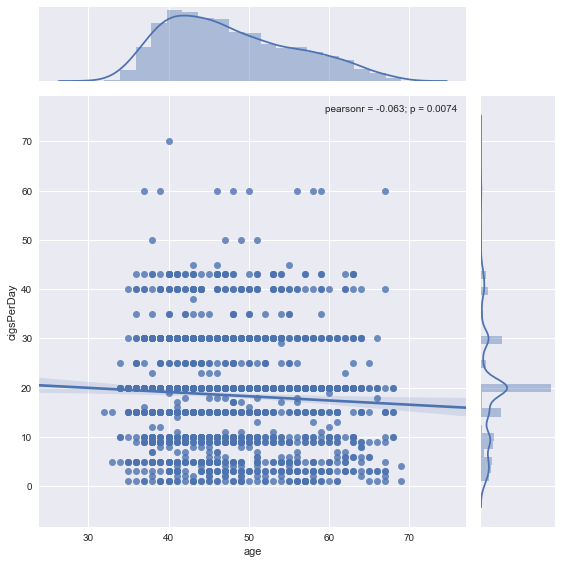

In [302]:
sns.jointplot(y=DataSet.cigsPerDay[(DataSet.cigsPerDay >0)] , x='age', data=DataSet, kind="reg", size=8);

<h3 style="direction:rtl;text-align: right;"><span style="color: #333399;">المستوى الدراسي لدى الجنسين : </span></h3>

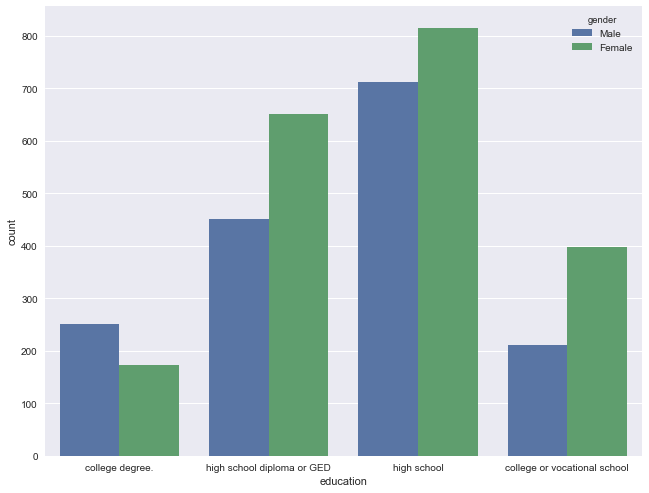

In [303]:
#sns.swarmplot(data=social_data, x='education', y='currentSmoker')
sns.countplot( cat_social_data.education,hue=cat_social_data.gender)

<h4 style="direction: rtl; text-align: right;"><strong><span style="color: #339966;">دراسة المؤشرات المتعلقة بصحة القلب :</span></strong></h4>
<h4 style="direction: rtl; text-align: right;">أولاً بناء اطار بيانات للمؤشرات الصحية :&nbsp;</h4>

In [304]:
med_data =DataSet.loc[:,"prevalentStroke":"TenYearCHD"]

<h4 style="direction: rtl; text-align: right;">عينة:&nbsp;</h4>

In [305]:
med_data.sample(4)

,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3351,0,1,0,259.0,195.0,110.0,20.09,75.0,63.0,1
2251,0,0,0,220.0,114.0,73.5,27.06,68.0,67.0,0
1970,0,0,0,212.0,132.0,82.0,34.52,80.0,72.0,0
2361,0,1,0,254.0,132.0,96.0,29.35,90.0,67.0,0


<h2 id="تحليل-الإرتباط-بين-بيانات-العينات" style="direction: rtl; text-align: right;"><span style="color: #000080;">تحليل الإرتباط بين البيانات الطبية</span></h2>


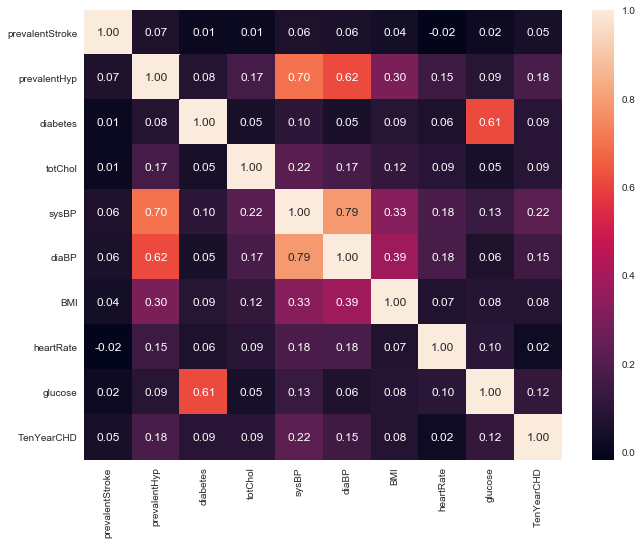

In [306]:
sns.heatmap(med_data.corr(), annot=True, fmt=".2f")

<h3 style="direction: rtl; text-align: right;"><span style="color: #000080;">التوزيع العمري للمرضى الذين أصيبوا بمرض القلب التاجي في العشر سنوات الأخيرة</span></h3>

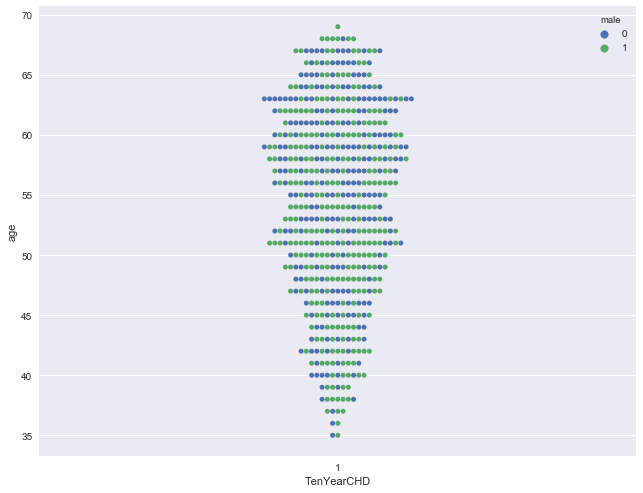

In [307]:
sns.swarmplot(x=DataSet.TenYearCHD[(DataSet.TenYearCHD == 1 )] , y=DataSet.age[(DataSet.TenYearCHD == 1 )],hue=DataSet.male[(DataSet.TenYearCHD == 1 )], data=DataSet )

<h3 style="direction: rtl; text-align: right;"><span style="color: #000080;">التوزيع العمري لمرضى السكري</span></h3>

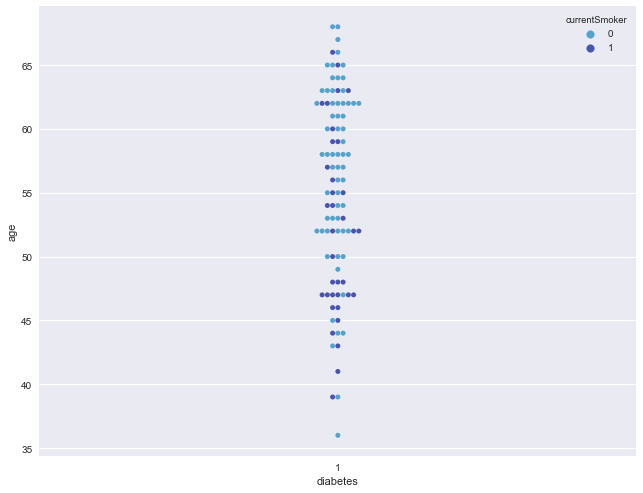

In [308]:
sns.set(rc={'figure.figsize':(10.7,8.27)})

#sns.set_style("whitegrid")
sns.set_palette("icefire")
sns.swarmplot(x=DataSet.diabetes[(DataSet.diabetes == 1 )] , y=DataSet.age[(DataSet.diabetes == 1 )],hue=DataSet.currentSmoker[(DataSet.diabetes == 1 )], data=DataSet )

<h3 style="direction:rtl;text-align: right;"><span style="color: #333399;">مرض القلب التاجي لدى الجنسين : </span></h3>

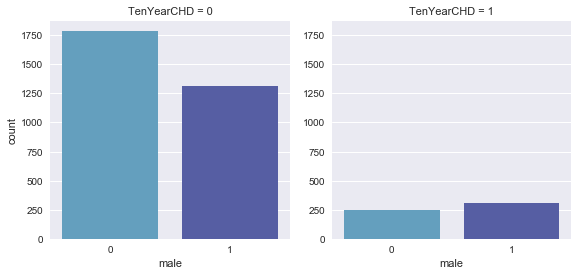

In [309]:
sns.factorplot(x='male', col='TenYearCHD', kind='count', data=DataSet)

<p style="direction: rtl; text-align: right;"><span style="color: #000000; background-color: #ffff00;">&nbsp;تفاديا للاطالة في استعراض البيانات نكتفي بهذا وننتقل الى "تعلم الآلة " .</span></p>

<h1 style="direction: rtl;"><span style="color: #008080;">التصنيف وخوارزميات تعلم الآلة </span></h1>
<h2 style="direction:rtl;text-align: right;"><span style="color: #333399;">مصنف شجرة القرارات </span></h2>
<p style="text-align: right;">Decision Tree Classifier</p>

<p style="direction: rtl; text-align: right;">أشجارُ القرار هي طريقةُ تعلُّمٍ غيرِ خاضعٍ للإشراف، تُستَخدَمُ للتصنيف والانحدار (Regression). الهدفُ منها خَلْقُ نموذجٍ لتنبُّؤِ قيمةِ متغيرِ الهدف، عن طريق تعلُّمِ قواعدِ قرارٍ بسيطةٍ مُستنتجةٍ من ميزات البيانات (Features). تُطبَّقُ عمليةُ التصنيفِ عن طريقِ مجموعةٍ من القواعدِ أو الشُّروطِ التي تُحدِّدُ المسار الذي سيُتَّبعُ ابتداءً من عقدة الجذر وانتهاءً بإحدى العقد النهائية التي تمثل الرمزَ للشيء المصنّف، وينبغي عندَ كلِّ العقد غير النهائية اتخاذُ قرارٍ حول مسارِ العقد التالية .</p>
<p style="direction: rtl; text-align: right;"><a href="https://www.syr-res.com/article/11866.html">المصدر</a></p>

<h3 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">أولاً : نموذج التنبوء باحتمالية الاصابة بالسكري&nbsp;</span></h3>
<h3 style="direction: rtl; text-align: right;"><span style="color: #003366;">تحضير البيانات :</span></h3>
<p style="direction: rtl; text-align: right;">سيتم فصل وتقسيم البيانات إلى المصفوفة 'x' التي ستحتوي على بيانات الـfeatures التي سنستخدمها للتدريب ، والمصفوفة 'y' تحتوي فقط على قيم العمود 'diabetes' أي الـtarget ، هذا يعني أن x ستحتوي على مميزات كل شخص و y عبارة عن مصفوفة من عمود واحد و كل صف في y سيحتوي على قيمة إما 1 إذا كان الشخص قد أصيب بمرض السكري أو 0 إذا لم يصب . خوارزمية التنصيف ستقارن قيم أو مميزات كل صف في المجموعة x مع القيمة المقابلة لها في المصفوفة y لتكتشف أنماط معينة للأسباب التي يمكن أن تكون قد أثرت في اصابة الشخص بمرض السكري .</p>

In [356]:
x = DataSet[['male','age','cigsPerDay','BMI','glucose','totChol']].values
y = DataSet['diabetes'].values

<p style="direction: rtl; text-align: right;"><span style="color: #0000ff;">الخصائص التي استعملناها في x :</span></p>
<p style="direction: rtl; text-align: right;">الجنس ، العمر ، عدد السجائر في اليوم ،&nbsp;مؤشر كتلة&nbsp;<strong>الجسم</strong>&nbsp;BMI ، مستوى الجلوكوز بالدم،<span id="noHighlight_0.2565515102103555">&nbsp;</span><span id="ouHighlight__18_22TO7_11" class="">مستوي</span><span id="noHighlight_0.6461220997431363">&nbsp;</span><span id="ouHighlight__6_16TO13_22" class="">الكولسترول</span></p>
<p style="direction: rtl; text-align: right;"><span style="background-color: #ffff99;">'male' , 'age' , 'cigsPerDay' , 'BMI' , 'glucose' , 'totChol'</span></p>

<p style="direction: rtl; text-align: right;"><span style="color: #0000ff;">بيانات التدريب والاختبار :</span></p>
<p style="direction: rtl; text-align: right;">سنقسم كل من المصفوفة x و y إلى بيانات للتدريب وبيانات للإختبار.سنستخجم 80% من المصفوفة 'x' و المصفوفة 'y' للتدريب و 20% ستستخدم للإختبار.</p>

In [357]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<h4 style="direction: rtl;"><span style="color: #3366ff;">تهيئة نموذج شجرة القرار (Decision Tree Classifier) :</span></h4>
<p style="direction: rtl; text-align: right;"><span style="color: #333300;">مع تحديد أقصى عمق ممكن لفروع الشجرة في 10 .</span></p>

In [358]:
D3 =tree.DecisionTreeClassifier(max_depth=10)

<h4 style="direction: rtl; text-align: right;"><span style="color: #3366ff;">تغذية نموذج شجرة القرار ببيانات التدريب :</span></h4>
<p style="direction: rtl; text-align: right;"><span style="color: #333300;">تسمى هذه العملية "التدريب" .</span></p>

In [359]:
D3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<h4 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">اختبار فاعلية النموذج :</span></h4>
<p style="direction: rtl; text-align: right;">شجرة القرار جاهزة, سيكون بإمكاننا أن نختبر فاعليتها 'score' باستخدام بيانات التدريب والاختبار لنعرف مدى دقتها .</p>

In [360]:
print(D3.score (x_test, y_test)*100,"%")

98.2240437158 %


<p style="direction: rtl; text-align: right;"><span style="color: #333300; background-color: #ffff00;"><strong>النتائج أظهرت أن شجرة القرار نجحت في توقع &nbsp;%98 من مجموعة البيانات المعدة للإختبار بشكل صحيح ، مما يعني أن جودتها عالية&nbsp; .</strong></span></p>

<h3 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">استعمال النموذج لتوقع الاصابة بمرض السكري&nbsp;</span></h3>
<p style="direction: rtl; text-align: right;"><strong><span style="color: #003300;">سنقوم بادخال بيانات شخص جديد لتوقع اصابته بمرض السكري :</span></strong></p>

In [361]:
male = 1
age =35
cigsPerDay =40
BMI =35
glucose =110
totChol =120

<h3 style="direction: rtl; text-align: right;"><span style="color: #00ff00;">توقع النتيجة :</span></h3>

In [362]:
D3.fit(x,y)
print ( D3.predict( [[ male ,age ,cigsPerDay ,BMI ,glucose ,totChol ]] ))

[1]


<p style="direction: rtl;text-align: right;"><strong><span style="background-color: #ffff00;"><span style="background-color: #00ff00;">انطلاقا من معلومات الشخص الجديد تم توقع اصابته بمرض السكري</span><span style="background-color: #ccffcc;"> ، شجرة القرار ترجع القيمة [1] في حالة الاصابة بالسكري وترجع القيمة [0] في حالة عدم الاصابة .</span></span></strong></p>

<h4 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">اضافة شخص آخر للتأكد من أن النموذج يعمل بشكل جيد :</span></h4>

In [363]:
male = 0
age =45
cigsPerDay =5
BMI =25
glucose =110
totChol =250

In [364]:
D3.fit(x,y)
print ( D3.predict( [[ male ,age ,cigsPerDay ,BMI ,glucose ,totChol ]] ))

[0]


<p style="text-align: right;"><span style="background-color: #00ff00;"><strong>كما نرى فاِن النتيجة هي [0] عكس الشخص السابق ، هنا تم توقع عدم اصابة الشخص الجديد بمرض السكري .</strong></span></p>

<h3 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">ثانيا: نموذج توقع الاصابة بمرض القلب التاجي&nbsp;</span></h3>
<h3 style="direction: rtl; text-align: right;"><span style="color: #003366;">تحضير البيانات :</span></h3>
<p style="direction: rtl; text-align: right;"><span style="color: #003366;">سنقوم بتكرار الخطوات السابقة التي قمنا بها في نموذج توقع الاصابة بالسكري مع تغيير الـtarget الى&nbsp;TenYearCHD</span></p>

In [365]:
x = DataSet[['male','age','cigsPerDay','BMI','glucose','totChol','diabetes']].values
y = DataSet['TenYearCHD'].values

In [366]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 30)

<h4 style="direction: rtl;"><span style="color: #3366ff;">تهيئة نموذج شجرة القرار (Decision Tree Classifier) :</span></h4>

In [367]:
D3 =tree.DecisionTreeClassifier(max_depth=10)

<h4 style="direction: rtl; text-align: right;"><span style="color: #3366ff;">تغذية نموذج شجرة القرار ببيانات التدريب :</span></h4>
<p style="direction: rtl; text-align: right;"><span style="color: #333300;">تسمى هذه العملية "التدريب" .</span></p>

In [368]:
D3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<h4 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">اختبار فاعلية النموذج :</span></h4>

In [369]:
print(D3.score (x_test, y_test)*100,"%")

83.7431693989 %


<p style="direction: rtl; text-align: right;"><span style="color: #333300; background-color: #ffff00;"><strong>النتائج أظهرت أن شجرة القرار نجحت في توقع &nbsp;%83 من مجموعة البيانات المعدة للإختبار بشكل صحيح ، جيد .</strong></span></p>

<h3 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">استعمال النموذج لتوقع الاصابة بمرض القلب التاجي&nbsp;</span></h3>
<p style="direction: rtl; text-align: right;"><span style="color: #003300;"><strong>بيانات شخص جديد :</strong></span></p>

In [370]:
male = 1
age =65
cigsPerDay =0
BMI =40
glucose =90
totChol =120
diabetes = 0

<h3 style="direction: rtl; text-align: right;"><span style="color: #00ff00;">توقع النتيجة :</span></h3>

In [371]:
D3.fit(x,y)
print ( D3.predict( [[ male ,age ,cigsPerDay ,BMI ,glucose ,totChol,diabetes ]] ))

[1]


<p style="direction: rtl; text-align: right;"><span style="background-color: #00ff00;"><strong>&nbsp;[1] :تم توقع الاصابة بمرض القلب التاجي .&nbsp;</strong></span></p>

<h4 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">اضافة شخص آخر للتأكد من أن النموذج يعمل بشكل جيد :</span></h4>

In [372]:
male = 0
age =65
cigsPerDay =5
BMI =25
glucose =110
totChol =250
diabetes = 0

In [373]:
D3.fit(x,y)
print ( D3.predict( [[ male ,age ,cigsPerDay ,BMI ,glucose ,totChol ,diabetes ]] ))

[0]


<p style="text-align: right;"><span style="background-color: #00ff00;"><strong>كما نرى فاِن النتيجة هي [0] عكس الشخص السابق ، هنا تم توقع عدم اصابة الشخص الجديد بمرض السكري .</strong></span></p>

<h2 style="direction: rtl; text-align: right;">&nbsp;</h2>
<h1 style="direction: rtl; text-align: right;"><span style="color: #333399;">خوارزميات تصنيفية أخرى في تعلم الآلة&nbsp;</span></h1>
<p style="direction: rtl; text-align: right;">&nbsp;</p>
<h4 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">&nbsp;خوارزمية الغابة العشوائية&nbsp;</span>"Random Forest"</h4>
<p style="direction: rtl; text-align: right;">&nbsp;</p>
<p style="direction: rtl; text-align: right;">خوارزمية الغابة العشوائية مستوحاةٌ من شجرة القرار (Classification and Regression Trees )، وهي إحدى طرق تعلُّمِ الآلة لبناءِ نماذجَ تنبؤٍ من البيانات، إذ يتمُّ الحصول على النماذج من خلال تقسيمِ البياناتِ وبناءِ نموذجٍ بسيطٍ للتنبُّؤ داخلَ كلِّ قسم.</p>
<p style="direction: rtl; text-align: right;"><a href="http://www.syr-res.com/article/11885.html" target="_blank" rel="noopener">المصدر</a></p>

<h2 style="direction: rtl; text-align: right;"><span style="color: #008000;">&nbsp;تطبيق خوارزمية الغابات العشوائية في توقع مرض القلب التاجي :</span></h2>

In [374]:
x = DataSet[['male','age','cigsPerDay','BMI','glucose','totChol','diabetes']].values
y = DataSet['TenYearCHD'].values

In [375]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 30)

<h4 style="direction: rtl;"><span style="color: #3366ff;">تهيئة نموذج الغابة العشوائية  :</span></h4>

In [376]:
Rf = ske.RandomForestClassifier(n_estimators=50)

In [377]:
Rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<h4 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">اختبار فاعلية النموذج :</span></h4>

In [378]:
print(Rf.score (x_test, y_test)*100,"%")

85.2459016393 %


<p style="direction: rtl; text-align: right;"><span style="color: #333300; background-color: #ffff00;"><strong>الغابة العشوائية نجحت في توقع &nbsp;%84 من مجموع البيانات المعدة للإختبار بشكل صحيح ، أفضل من شجرة القرار .</strong></span></p>

<h3 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">استعمال النموذج لتوقع الاصابة بمرض القلب التاجي&nbsp;</span></h3>
<p style="direction: rtl; text-align: right;"><span style="color: #003300;"><strong>بيانات شخص جديد :</strong></span></p>

In [379]:
male = 0
age =65
cigsPerDay =20
BMI =0
glucose =100
totChol =120
diabetes = 0

<h3 style="direction: rtl; text-align: right;"><span style="color: #00ff00;">توقع النتيجة :</span></h3>

In [380]:
Rf.fit(x,y)
print (Rf.predict( [[ male ,age ,cigsPerDay ,BMI ,glucose ,totChol,diabetes ]] ))

[1]


<h3 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">&nbsp;خوارزمية Gradient Boosting</span></h3>
<h3 style="direction: rtl; text-align: right;"><br />خوارزمية التصنيف &ldquo;Gradient Boosting&rdquo; سوف تولد العديد من أشجار التوقع الضعيفة ثم تدمجهم أو تحسنهم من خلال نموذج قوي .</h3>
<p style="text-align: right;"><a href="https://en.wikipedia.org/wiki/Gradient_boosting" target="_blank" rel="noopener">شرح طريقة عمل الخوارزمية.</a></p>

In [381]:
Gb = ske.GradientBoostingClassifier(n_estimators=50)

In [382]:
Gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

<h4 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">اختبار فاعلية النموذج :</span></h4>

In [383]:
print(Gb.score (x_test, y_test)*100,"%")

86.0655737705 %


<p style="direction: rtl; text-align: right;"><span style="color: #333300; background-color: #ffff00;"><strong>Gradient boost نجحت في توقع &nbsp;%86 من مجموع البيانات المعدة للإختبار بشكل صحيح .</strong></span></p>

<h3 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">استعمال النموذج لتوقع الاصابة بمرض القلب التاجي&nbsp;</span></h3>
<p style="direction: rtl; text-align: right;"><span style="color: #003300;"><strong>بيانات شخص جديد :</strong></span></p>

In [384]:
male = 0
age =25
cigsPerDay =20
BMI =0
glucose =100
totChol =120
diabetes = 0

<h3 style="direction: rtl; text-align: right;"><span style="color: #00ff00;">توقع النتيجة :</span></h3>

In [385]:
Gb.fit(x,y)
print (Gb.predict( [[ male ,age ,cigsPerDay ,BMI ,glucose ,totChol,diabetes ]] ))

[0]


<h3 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">&nbsp;خوارزمية التصويت&nbsp;</span></h3>
<p style="direction: rtl; text-align: right;">خورزمية "Voting" تطبق نماذج تصنيف متعددة مثل النماذج التي عملنا عليها من قبل على البيانات، وسوف تختبر أكثر من خوارزمية وتحدد النتيجة ذات التوقع الأفضل .</p>

In [386]:
Vc = ske.VotingClassifier([('dt',D3),('rf',Rf ),('gb',Gb)])

<h4 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">اختبار فاعلية النموذج :</span></h4>

In [387]:
Vc.fit(x_train,y_train)
print(Vc.score (x_test, y_test)*100,"%")

85.7923497268 %


<p style="direction: rtl; text-align: right;"><span style="background-color: #00ff00;"><strong style="color: #333300;"><strong>خوارزمية التصويت نجحت في توقع&nbsp;</strong><strong>%</strong><strong>85 من مجموع البيانات المعدة للإختبار</strong></strong></span></p>

<h3 style="direction: rtl; text-align: right;"><span style="color: #0000ff;">استعمال النموذج لتوقع الاصابة بمرض القلب التاجي&nbsp;</span></h3>
<p style="direction: rtl; text-align: right;"><span style="color: #003300;"><strong>بيانات شخص جديد :</strong></span></p>

In [390]:
male = 0
age =25
cigsPerDay =20
BMI =0
glucose =100
totChol =120
diabetes = 0

<h3 style="direction: rtl; text-align: right;"><span style="color: #00ff00;">توقع النتيجة :</span></h3>

In [391]:
Vc.fit(x,y)
print (Vc.predict( [[ male ,age ,cigsPerDay ,BMI ,glucose ,totChol,diabetes ]] ))

[1]


<h2 style="direction: rtl; text-align: right;"><span style="color: #339966;">نظرة أخيرة على نتائج التوقع :</span></h2>
<p style="direction: rtl; text-align: right;">في عملنا هذا على خوارزميات التصنيف الثلاثة التي تستعمل في التعلم الآلي وتنقيب البيانات : أشجار القرار والغابة العشوائية وخورزمية التصويت ، تبين أن :خوارزمية التصويت نجحت في توقع&nbsp;%85 من مجموع البيانات المعدة للإختبار ، متفوقة على خوارزمية شجرة القرار التي توقعت&nbsp;%83 فقط، وخوارزمية الغابة العشوائية التي توقعت&nbsp;%84 من النتاائج الصحيحة .</p>